In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def distances(X,y, w, with_lagrange=True):
    #considering 1 width of margin
        distances = y * (np.dot(X, w)) - 1
      

        if with_lagrange:  # if lagrange multiplier considered
            # if distance is more than 0
            # sample is not on the support vector
            # Lagrange multiplier will be 0
            distances[distances > 0] = 0

        return distances

In [17]:
def get_cost_grads(X, w, y,C):

        distances_d = distances(X,y,w)
        dw = np.zeros(len(w))

        for ind, d in enumerate(distances_d):
            if d == 0:  # if sample is not on the support vector
                di = w  # (alpha * y[ind] * X[ind]) = 0
            else:
                # (alpha * y[ind] * X[ind]) = y[ind] * X[ind]
                di = w - (C * y[ind] * X[ind])
            dw += di
        return  dw / len(X)

In [18]:

def fit(num_of_epochs,X, w, y,C,lr):
        for i in range(num_of_epochs):
            dw = get_cost_grads(X, w, y,C)
            w = w - lr * dw
            if i % 1000 == 0:
              distances_d = distances(X,y,w)
              # Get current cost
              L = 1 / 2 * np.dot(w, w) - C * np.sum(distances_d)
              print(i, ' | ', L)
        print("\nFinal value of weight:\n",w)
        return w

In [19]:
def predict(X,w):
  return np.sign(X @ w)

dimension of x1 = x2 = (50, 2)


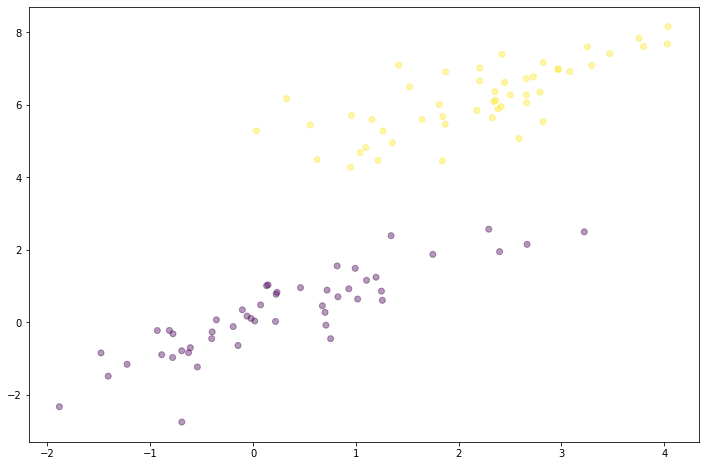

In [20]:
si = 50    #size of the data set we are creating
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], si)
x2 = np.random.multivariate_normal([2, 6], [[1, .75],[.75, 1]], si)

print("dimension of x1 = x2 =",x1.shape)
sfeature=np.vstack((x1, x2)).astype(np.float32)     #concatinates axis 0
slabel=np.hstack((np.zeros(si), np.ones(si)))  


plt.figure(figsize=(12,8))
plt.scatter(sfeature[:, 0], sfeature[:, 1], c = slabel, alpha = .4)

In [25]:
X = np.column_stack((np.ones(len(sfeature)), sfeature)) 
w = np.zeros(len(X[0]))


w=fit(10000, X , w , slabel , C=30 , lr=1e-3)


0  |  2011.5913491495967
1000  |  1500.0249135220645
2000  |  1500.0388655802003
3000  |  1500.0249148691282
4000  |  1500.024790371758
5000  |  1500.0249662055967
6000  |  1500.0248421223555
7000  |  1500.0515253635926
8000  |  1500.0248941051618
9000  |  1500.0247695194844

Final value of weight:
 [0.04975684 0.04722834 0.21280519]


In [26]:
p=X@w
p=np.sign(p)
p[p==-1]=0
p-=slabel.flatten()

print("Accuracy |", len(np.where(p == 0)[0]) / len(p))

Accuracy | 0.68
